<a href="https://colab.research.google.com/github/yagu6173/4622-ml-project3/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CSPB 4622 Machine Learning Project 3 Report  
Name: Yan Gu  
Link to repo: https://github.com/cu-cspb-4622-summer-2025/P3-yagu6173

# Project Topic
This project focuses on understanding images and predicting the objects in the image at category level.  

There are ten object categories: airplane, automobile bird, cat deer, dog, frog, horse, ship and truck.  

From learning the dataset of images and their label of category, we can train a deep learning model. Based on the model, we can predict the category of unseen images.  

Image object understanding is foundational to computer vision.  By working on this project, I can gain hands-on experience in applying CNN techniques.

### Dataset Description
Data source: https://www.cs.toronto.edu/~kriz/cifar.html
The dataset is called CIFAR-10. It's a very famous dataset in deep learning as it's used as a benchmark for image classification and it's friendly for beginners in deep learning.

Each sample in the data is an image of an object. Each image has 32x32 pixel of 3 colors and has a label indicating the category of the object.
The dataset has already been train test splitted. There are 50000 images in the training set, and 10000 images in the testing set.

# 1. Data cleaning and EDA

Load the date from data source:

In [2]:
from tensorflow.keras import datasets, layers, models

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


Check the size of one sample image data:

array([[[175, 177, 153],
        [178, 180, 156],
        [183, 185, 161],
        ...,
        [205, 207, 186],
        [204, 206, 185],
        [203, 205, 184]],

       [[176, 176, 152],
        [176, 176, 153],
        [181, 181, 157],
        ...,
        [202, 204, 184],
        [201, 203, 182],
        [200, 202, 181]],

       [[152, 150, 127],
        [173, 170, 147],
        [185, 182, 160],
        ...,
        [203, 205, 184],
        [201, 203, 182],
        [200, 202, 181]],

       ...,

       [[100,  96,  69],
        [ 95,  91,  64],
        [ 92,  88,  61],
        ...,
        [ 87,  62,  59],
        [ 72,  58,  54],
        [ 57,  57,  55]],

       [[102,  98,  71],
        [ 98,  94,  68],
        [ 95,  91,  64],
        ...,
        [ 99,  65,  60],
        [ 77,  56,  52],
        [ 47,  43,  41]],

       [[103,  99,  72],
        [101,  97,  70],
        [ 98,  94,  67],
        ...,
        [ 69,  54,  50],
        [ 60,  51,  48],
        [ 47,  49,  47]]], dtype=uint8)
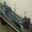

In [34]:
X_train[0]

In [18]:
y_train[0]

array([6], dtype=uint8)

In [33]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
class_names[y_train[0][0]]

'ship'

This tells us that in X_train, each sample is a 32 by 32 by 3 array. There are 32 rows, 32 colums, and each cell is a 3-vector of color element red/yelow/blue.
Each sample in y_train is an 1-vecotr array.
This specific sample is an image of frog since the corresponding label is 6.

Visualize more sample images:

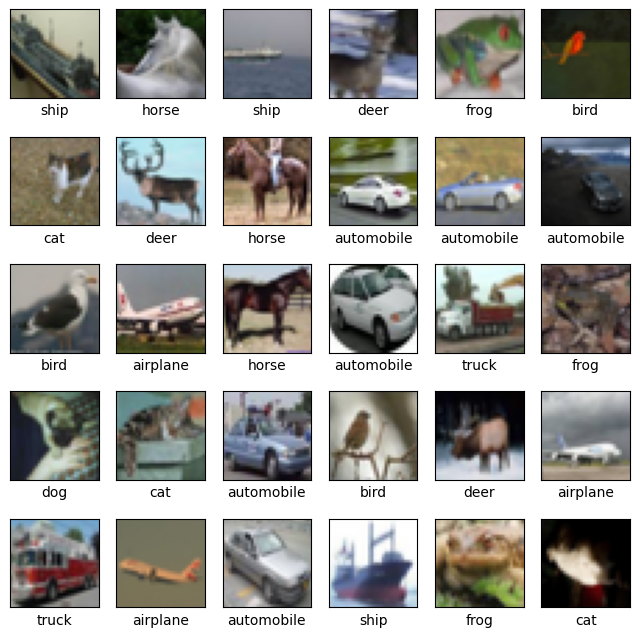

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

# More EDA

Now let's split the training set into training and validation by a ratio of 0.1
The validation will be used to validate the trained model.


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)


In [25]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((40500, 32, 32, 3), (4500, 32, 32, 3), (40500, 1), (4500, 1))

<BarContainer object of 10 artists>

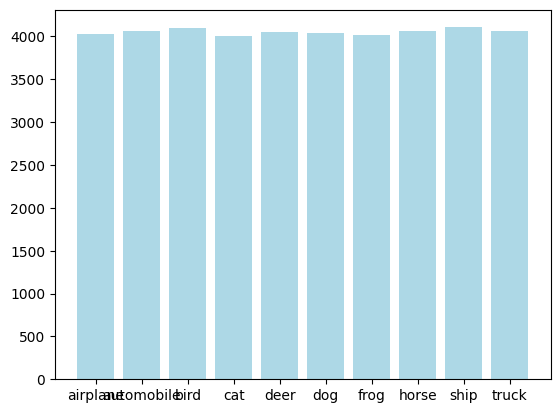

In [38]:
import numpy as np

classes_name = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
classes, counts = np.unique(y_train, return_counts=True)
plt.bar(classes_name, counts, color = 'lightblue')


The histogram shows that ech category is evenly distributed in the split training dataset. No significant bias of weight exists.

Convert class label to categorical labels by one-hot-encoding.  
This lets the model make 10 binary predictions.

In [39]:
from keras.utils import to_categorical
n = len(class_names)
y_train1 = to_categorical(y_train, n)
y_valid1 = to_categorical(y_valid, n)
y_test1 = to_categorical(y_test, n)

In [40]:
y_train[0], y_train1[0]

(array([8], dtype=uint8), array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]))

Only the element of index 8 will have value of 1. All others are 0. This confirmes that the convertion is correct.

Downscale pixel values into range between 0 and 1. This helps with data manipulation in the training process.

In [69]:
X_train1 = X_train / 255.0
X_valid1 = X_valid / 255.0
X_test1 = X_test / 255.0

# 2. Model Selection and Training

First, let's have a very simple model with limited number of layers:

In [68]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.regularizers import l2

model = Sequential()

weight_decay = 0.0001

# Add the convolutional layer and batch normalization layer
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay),
                 input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay),
                 input_shape=X_train.shape[1:]))
model.add(BatchNormalization())

# Add max pooling and dropout layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))


# Add flatten and dense layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        81,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,330 (360.66 KB)

 Trainable params: 92,202 (360.16 KB)

 Non-trainable params: 128 (512.00 B)

Train and evaluate the simple model:

In [70]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

epochs = 300
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.fit(X_train1, y_train1, epochs=300, validation_data=(X_valid1, y_valid1), callbacks=[early_stopping], verbose=2)

Epoch 1/300
1266/1266 - 14s - 11ms/step - accuracy: 0.4683 - loss: 1.7779 - val_accuracy: 0.5487 - val_loss: 1.3870
Epoch 2/300
1266/1266 - 13s - 10ms/step - accuracy: 0.6124 - loss: 1.1267 - val_accuracy: 0.6262 - val_loss: 1.0939
Epoch 3/300
1266/1266 - 7s - 6ms/step - accuracy: 0.6637 - loss: 0.9683 - val_accuracy: 0.6291 - val_loss: 1.0932
Epoch 4/300
1266/1266 - 8s - 6ms/step - accuracy: 0.6977 - loss: 0.8802 - val_accuracy: 0.6473 - val_loss: 1.0290
Epoch 5/300
1266/1266 - 6s - 4ms/step - accuracy: 0.7170 - loss: 0.8214 - val_accuracy: 0.6260 - val_loss: 1.1009
Epoch 6/300
1266/1266 - 5s - 4ms/step - accuracy: 0.7345 - loss: 0.7706 - val_accuracy: 0.6447 - val_loss: 1.0807
Epoch 7/300
1266/1266 - 6s - 5ms/step - accuracy: 0.7468 - loss: 0.7315 - val_accuracy: 0.6562 - val_loss: 1.0556
Epoch 8/300
1266/1266 - 5s - 4ms/step - accuracy: 0.7625 - loss: 0.6904 - val_accuracy: 0.6498 - val_loss: 1.0725
Epoch 9/300
1266/1266 - 5s - 4ms/step - accuracy: 0.7744 - loss: 0.6540 - val_accura

In [71]:
model1 = model

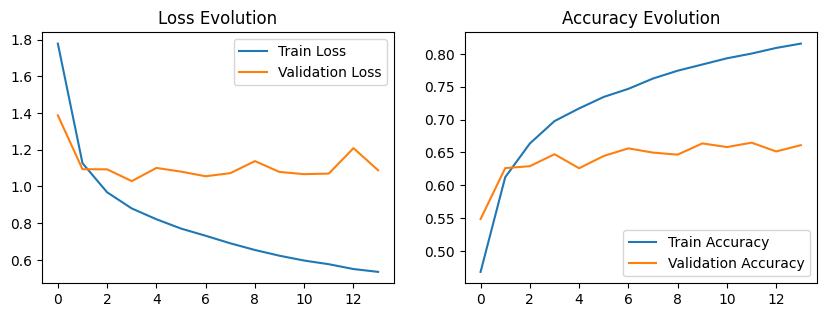

In [72]:
plt.figure(figsize=(10,15))

plt.subplot(4, 2, 1)
plt.plot(model1.history.history['loss'], label='Train Loss')
plt.plot(model1.history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(4, 2, 2)
plt.plot(model1.history.history['accuracy'], label='Train Accuracy')
plt.plot(model1.history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


plt.show()



In [74]:
test_loss, test_acc = model1.evaluate(X_test1, y_test1, verbose=1)
test_loss, test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6732 - loss: 1.0472


(1.061385989189148, 0.66839998960495)

More layers added to the model:

In [76]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.regularizers import l2

model = Sequential()
shape = (32,32,3)
weight_decay = 0.0001

# Add the convolutional layer and batch normalization layer
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay), input_shape=shape))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay), input_shape=shape))
model.add(BatchNormalization())

# Add max pooling and dropout layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

# Add the convolutional layer and batch normalization layer
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay), input_shape=shape))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay), input_shape=shape))
model.add(BatchNormalization())

# Add max pooling and dropout layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

# Add the convolutional layer and batch normalization layer
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay), input_shape=shape))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay), input_shape=shape))
model.add(BatchNormalization())

# Add max pooling and dropout layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

# Add flatten and dense layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))


model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,29

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

In [77]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

epochs = 300
optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

model.fit(X_train, y_train1, epochs=300, validation_data=(X_valid, y_valid1), callbacks=[early_stopping], verbose=2)

Epoch 1/300
1266/1266 - 32s - 25ms/step - accuracy: 0.4132 - loss: 1.6691 - val_accuracy: 0.5516 - val_loss: 1.3074
Epoch 2/300
1266/1266 - 23s - 18ms/step - accuracy: 0.5873 - loss: 1.2140 - val_accuracy: 0.6531 - val_loss: 1.0272
Epoch 3/300
1266/1266 - 10s - 8ms/step - accuracy: 0.6616 - loss: 1.0104 - val_accuracy: 0.6718 - val_loss: 0.9941
Epoch 4/300
1266/1266 - 10s - 8ms/step - accuracy: 0.7068 - loss: 0.8923 - val_accuracy: 0.7240 - val_loss: 0.8515
Epoch 5/300
1266/1266 - 10s - 8ms/step - accuracy: 0.7359 - loss: 0.8145 - val_accuracy: 0.7644 - val_loss: 0.7325
Epoch 6/300
1266/1266 - 10s - 8ms/step - accuracy: 0.7587 - loss: 0.7535 - val_accuracy: 0.7653 - val_loss: 0.7435
Epoch 7/300
1266/1266 - 11s - 8ms/step - accuracy: 0.7794 - loss: 0.6970 - val_accuracy: 0.7858 - val_loss: 0.6964
Epoch 8/300
1266/1266 - 10s - 8ms/step - accuracy: 0.7991 - loss: 0.6560 - val_accuracy: 0.7947 - val_loss: 0.6491
Epoch 9/300
1266/1266 - 8s - 6ms/step - accuracy: 0.8118 - loss: 0.6182 - val_

In [78]:
model2 = model

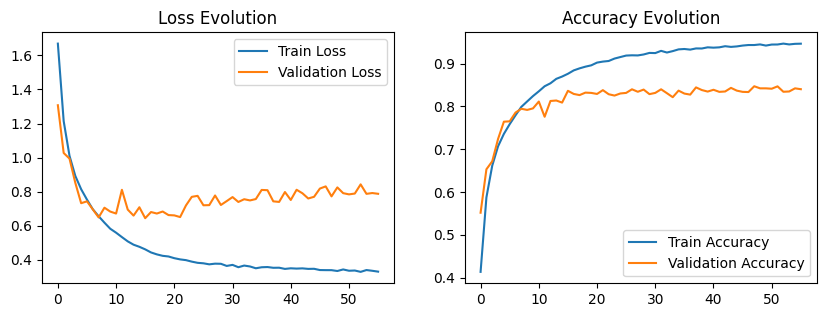

In [79]:
plt.figure(figsize=(10,15))

plt.subplot(4, 2, 1)
plt.plot(model2.history.history['loss'], label='Train Loss')
plt.plot(model2.history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(4, 2, 2)
plt.plot(model2.history.history['accuracy'], label='Train Accuracy')
plt.plot(model2.history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


plt.show()



In [81]:
test_loss, test_acc = model2.evaluate(X_test, y_test1, verbose=1)
test_loss, test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8195 - loss: 0.6751


(0.6808156371116638, 0.8180000185966492)

### Hyperparameter Tuning


In [59]:
epochs = 300
optimizer = Adam(learning_rate=0.01)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
reduced_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr = 0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

model.fit(X_train, y_train1, epochs=300, validation_data=(X_valid, y_valid1), callbacks=[reduced_lr,early_stopping], verbose=2)

Epoch 1/300
1266/1266 - 29s - 23ms/step - accuracy: 0.2892 - loss: 2.0547 - val_accuracy: 0.3740 - val_loss: 1.8519 - learning_rate: 0.0100
Epoch 2/300
1266/1266 - 25s - 19ms/step - accuracy: 0.4253 - loss: 1.7902 - val_accuracy: 0.4091 - val_loss: 1.8720 - learning_rate: 0.0100
Epoch 3/300
1266/1266 - 11s - 9ms/step - accuracy: 0.4601 - loss: 1.7766 - val_accuracy: 0.4669 - val_loss: 1.7771 - learning_rate: 0.0100
Epoch 4/300
1266/1266 - 7s - 6ms/step - accuracy: 0.4933 - loss: 1.7074 - val_accuracy: 0.5411 - val_loss: 1.5679 - learning_rate: 0.0100
Epoch 5/300
1266/1266 - 9s - 7ms/step - accuracy: 0.5112 - loss: 1.6452 - val_accuracy: 0.4911 - val_loss: 1.7636 - learning_rate: 0.0100
Epoch 6/300
1266/1266 - 8s - 6ms/step - accuracy: 0.5208 - loss: 1.6323 - val_accuracy: 0.5682 - val_loss: 1.5210 - learning_rate: 0.0100
Epoch 7/300
1266/1266 - 10s - 8ms/step - accuracy: 0.5384 - loss: 1.5996 - val_accuracy: 0.5853 - val_loss: 1.4421 - learning_rate: 0.0100
Epoch 8/300
1266/1266 - 10s 

In [60]:
model3 = model

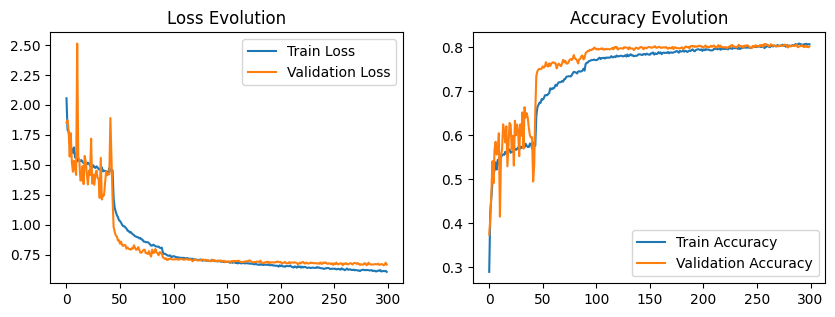

In [61]:
plt.figure(figsize=(10,15))

plt.subplot(4, 2, 1)
plt.plot(model3.history.history['loss'], label='Train Loss')
plt.plot(model3.history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(4, 2, 2)
plt.plot(model3.history.history['accuracy'], label='Train Accuracy')
plt.plot(model3.history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


plt.show()



In [66]:
test_loss, test_acc = model3.evaluate(X_test, y_test1, verbose=1)
test_loss, test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8027 - loss: 0.6688


(0.6816319227218628, 0.802299976348877)

# 3. Results and Analysis


|Method|Loss|Accuracy|
|:----|:--------:|:--------:|
|Model 1 - limited layers| 1.0472 | 67% |
|Model 2 - more layers | 0.6751 |82% |
|Model 3 - learning rate | 0.6688 |80% |





# 4. Discussion and Conclusion


From the three models train above we can see that by adding more layers to the model, the accuracy improved a lot on unseen test dataset.  
However, with the tuning of learning rate, the loss dropped. The two lines of train and validation in model 3 became much closer to each other than other models. However, the accuracy on unseen test data became lower, which indicates that over-fitting may have happened to model 3. Also model 3 takes much longer (~30 min) to train than the other two.  

Model 2 performed the best on unseen all three models, as it balanced bias and variance.